In [1]:
import rlssm
import pandas as pd
import os

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data = data[data.participant == 12].reset_index(drop=True)

data['block_label'] += 1

# data = data[data['trial_block'] == 1]

data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,12,1.0,1.0,48.0,40.0,4,2,1.0,0.822152,0.0
1,12,1.0,2.0,50.0,37.0,3,1,1.0,0.858400,1.0
2,12,1.0,3.0,62.0,41.0,4,2,2.0,1.014982,1.0
3,12,1.0,4.0,47.0,36.0,3,1,2.0,1.001788,1.0
4,12,1.0,5.0,54.0,39.0,4,2,3.0,0.985146,1.0
...,...,...,...,...,...,...,...,...,...,...
233,12,3.0,76.0,55.0,40.0,4,2,38.5,0.914431,1.0
234,12,3.0,77.0,52.0,37.0,3,1,38.5,1.276829,1.0
235,12,3.0,78.0,49.0,48.0,4,3,40.0,1.299635,1.0
236,12,3.0,79.0,34.0,33.0,2,1,39.0,1.116690,1.0


In [3]:
model = rlssm.RLALBAModel_2A(1,
                           separate_learning_rates=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fe92bf29c319bff705ae4783020080d2 NOW.


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLALBA_2A', 'RLALBA_2A_2lr', 1)

In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)

In [6]:
model_fit = model.fit(data,
                      K,
                      initial_value_learning,
                      thin = n_thin,
                      iter = n_iter,
                      chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
90.0 of 140 iterations ended with a divergence (64.28571428571429%)
  Try running with larger adapt_delta to remove the divergences
0 of 140 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


In [7]:
model_fit.rhat.describe()

,rhat
count,8.000000
mean,1.024727
std,0.034916
min,0.988900
25%,1.000562
50%,1.015619
75%,1.042043
max,1.076617


In [8]:
model_fit.rhat.head()

,rhat,variable
0,1.076617,k
1,1.030686,A
2,1.076115,tau
3,1.003993,v0
4,1.008610,ws


In [9]:
model_fit.waic

{'lppd': -79.73251708248839,
 'p_waic': 6.390367919407775,
 'waic': 172.24577000379233,
 'waic_se': 27.370939587444816}

In [10]:
model_fit.samples

,chain,draw,transf_k,transf_A,transf_tau,transf_v0,transf_ws,transf_wd,transf_alpha_pos,transf_alpha_neg
0,0,32,1.957419,2.636890,0.477489,2.974397,0.002759,0.132638,0.944147,0.022153
1,0,46,1.743602,3.631926,0.531789,3.430104,0.001948,0.175134,0.949597,0.019433
2,0,68,2.604422,3.248735,0.391080,3.349916,0.004909,0.119000,0.880233,0.042571
3,0,66,1.525821,2.261192,0.538038,2.399238,0.004282,0.136476,0.822308,0.036581
4,0,37,4.119463,2.053900,0.165503,3.575491,0.001737,0.142488,0.986148,0.010062
...,...,...,...,...,...,...,...,...,...,...
135,1,9,1.921550,2.649758,0.489802,3.198781,0.001032,0.131314,0.967494,0.022409
136,1,65,2.507558,3.630596,0.395082,3.565689,0.003422,0.134514,0.514543,0.053174
137,1,66,2.403542,3.752416,0.448188,3.316362,0.007574,0.131896,0.905497,0.106945
138,1,45,2.314840,2.870147,0.451377,3.613747,0.000276,0.149013,0.996261,0.013133


In [11]:
model_fit.trial_samples

OrderedDict([('k_t',
              array([[1.95741944, 1.95741944, 1.95741944, ..., 1.95741944, 1.95741944,
                      1.95741944],
                     [1.74360167, 1.74360167, 1.74360167, ..., 1.74360167, 1.74360167,
                      1.74360167],
                     [2.60442227, 2.60442227, 2.60442227, ..., 2.60442227, 2.60442227,
                      2.60442227],
                     ...,
                     [2.40354203, 2.40354203, 2.40354203, ..., 2.40354203, 2.40354203,
                      2.40354203],
                     [2.31483979, 2.31483979, 2.31483979, ..., 2.31483979, 2.31483979,
                      2.31483979],
                     [1.65154627, 1.65154627, 1.65154627, ..., 1.65154627, 1.65154627,
                      1.65154627]])),
             ('A_t',
              array([[2.63689012, 2.63689012, 2.63689012, ..., 2.63689012, 2.63689012,
                      2.63689012],
                     [3.6319259 , 3.6319259 , 3.6319259 , ..., 3.6319259 , 

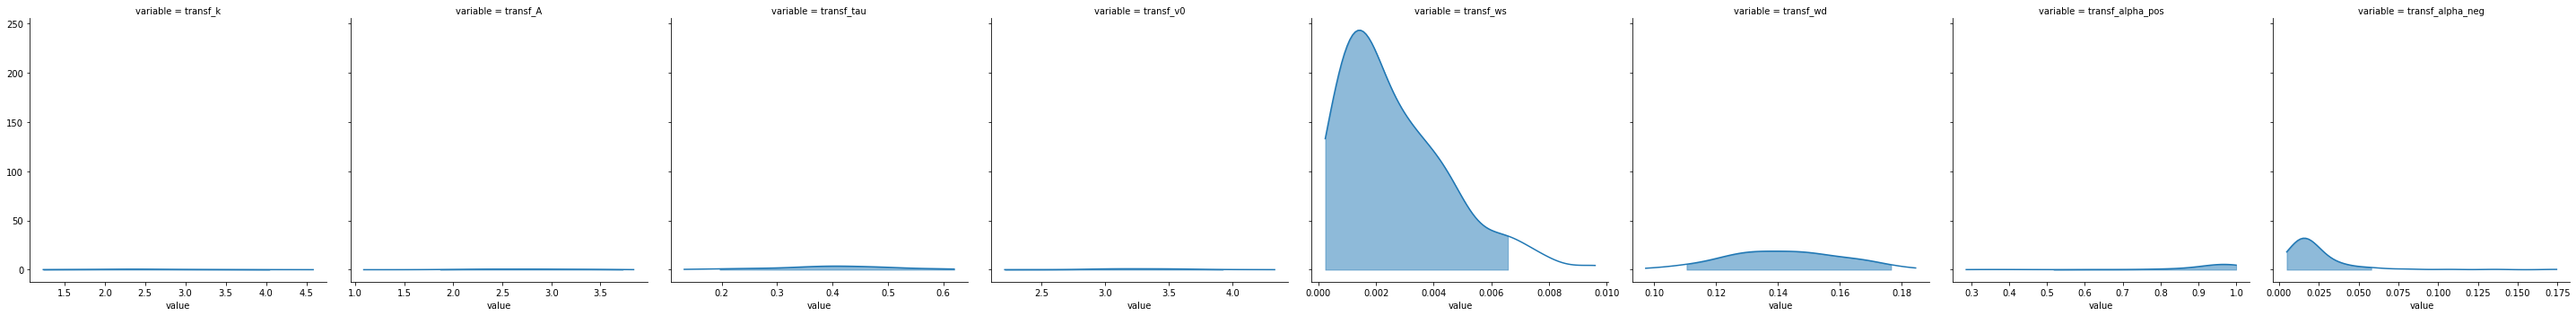

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [13]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.564486  2.369776  0.925207  0.954795  1.094458  1.349369   
2         0.955055  1.792820  1.604913  1.001327  1.158058  1.191150   
3         1.526734  0.966404  1.376226  1.207403  0.942472  1.148683   
4         1.921047  1.838796  1.163548  1.008081  1.163362  1.036656   
5         1.608531  1.322204  1.248691  1.433672  0.946686  0.948169   
...            ...       ...       ...       ...       ...       ...   
96        1.208710  1.280600  0.852022  0.962910  0.816796  0.894649   
97        1.540834  1.083140  1.067082  0.846405  1.001281  1.559486   
98        1.610352  1.352030  1.143512  1.361982  0.900919  1.003905   
99        1.388738  1.530968  1.445429  1.056191  0.992146  1.176960   
100       1.709029  1.330750  1.037359  1.389140  0.955823  1.236587   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      229  230  231  232   
sample                                            ...                           
1         0.948336  0.797176  1.566574  1.134852  ...      1.0  1.0  1.0  1.0   
2         1.109026  1.974744  1.213003  1.010950  ...      1.0  1.0  0.0  1.0   
3         1.276522  1.420843  1.063890  1.071847  ...      1.0  1.0  0.0  1.0   
4         1.177512  1.233202  1.017178  0.977523  ...      1.0  1.0  0.0  1.0   
5         0.707011  1.351316  1.273902  1.149294  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        0.936582  1.207679  1.593329  0.957363  ...      1.0  1.0  1.0  1.0   
97        0.979031  1.148207  1.371485  1.079006  ...      1.0  1.0  1.0  1.0   
98        0.835896  1.069654  1.384923  0.857312  ...      1.0  1.0  0.0  1.0   
99        1.046796  1.176246  1.233829  0.999821  ...      1.0  1.0  0.0  1.0   
100       0.995753  1.192865  0.998368  0.841738  ...      1.0  1.0  1.0  1.0   

variable                                
trial     233  234  235  236  237  238  
sample                                  
1         1.0  1.0  1.0  0.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  0.0  
3         1.0  1.0  1.0  0.0  0.0  0.0  
4         1.0  0.0  1.0  0.0  0.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  0.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  0.0  0.0  0.0  
97        1.0  1.0  1.0  0.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  0.0  
99        1.0  1.0  1.0  1.0  1.0  0.0  
100       1.0  1.0  1.0  0.0  1.0  0.0  

[100 rows x 476 columns]

In [14]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.810924,1.225491,1.466130,1.077670,1.203141,1.335318,1.450478,1.761342,0.915241,1.026633,1.162860,1.288013,1.515564
2,0.806723,1.226806,1.057720,1.002169,1.120100,1.250818,1.406994,1.609845,0.905077,1.052474,1.188170,1.324759,1.535147
3,0.752101,1.239684,1.360633,1.020402,1.147525,1.335068,1.447020,1.661644,0.896613,1.069444,1.197588,1.307510,1.513534
4,0.831933,1.200705,1.791344,1.018880,1.126423,1.222316,1.346750,1.664615,0.935610,1.057948,1.149380,1.246569,1.462571
5,0.764706,1.281923,0.976658,1.076121,1.246768,1.381382,1.510202,1.707341,0.931895,1.110511,1.220826,1.331303,1.547216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.798319,1.259994,1.376311,1.053627,1.294004,1.360489,1.456208,1.679311,0.919387,1.019386,1.168447,1.324182,1.640726
97,0.823529,1.242512,0.360002,1.041247,1.235458,1.395184,1.508879,1.654228,0.910938,1.057521,1.187897,1.326471,1.559809
98,0.777311,1.285651,1.332311,1.074578,1.197276,1.309586,1.436337,1.750828,0.957116,1.109550,1.204632,1.340291,1.642145


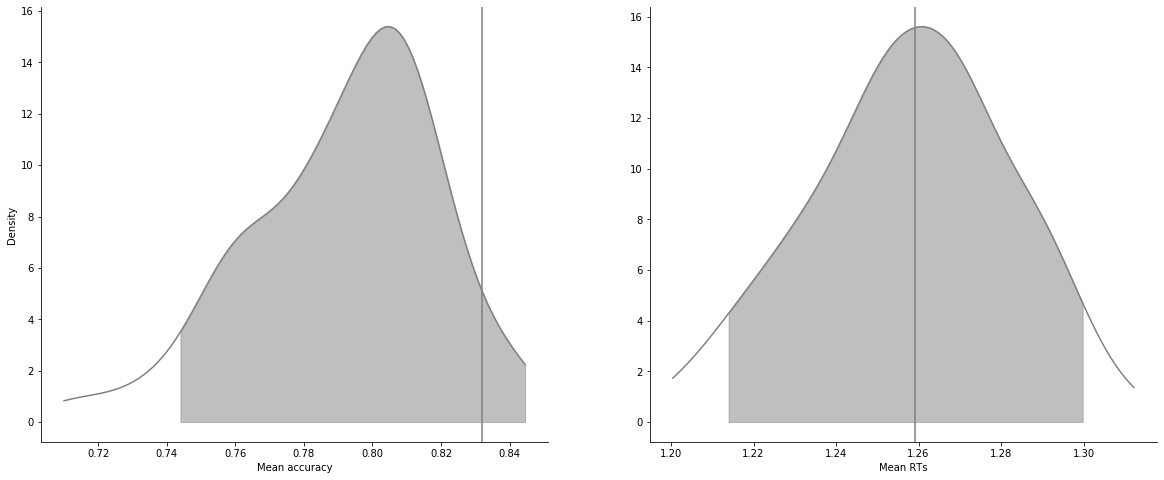

In [15]:
g = model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI')

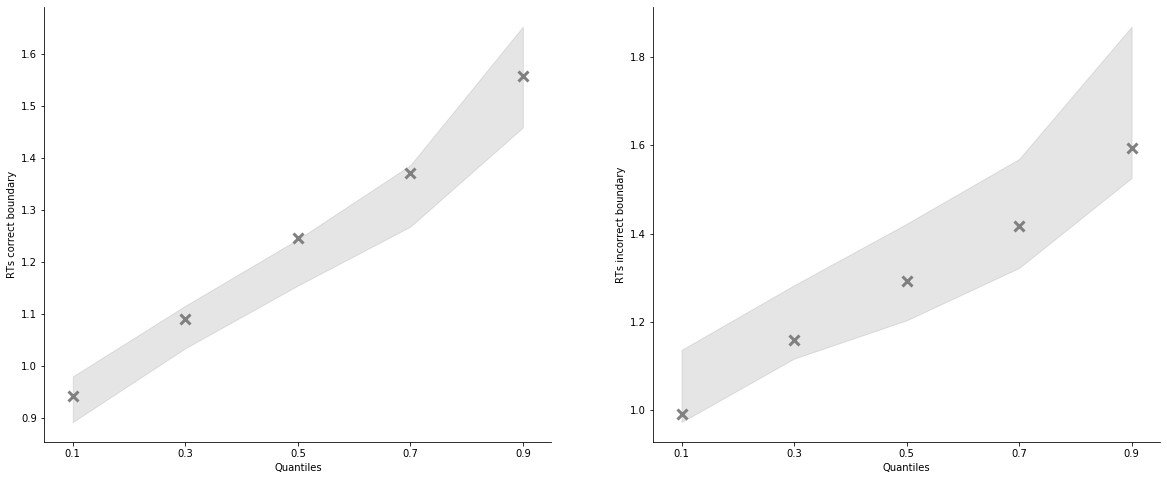

In [16]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [17]:
import numpy as np

In [18]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [19]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,12,1.0,1.0,48.0,40.0,4,2,1.0,0.822152,0.0,2,BD,1
1,1,12,1.0,2.0,50.0,37.0,3,1,1.0,0.858400,1.0,1,AC,1
2,2,12,1.0,3.0,62.0,41.0,4,2,2.0,1.014982,1.0,1,BD,1
3,3,12,1.0,4.0,47.0,36.0,3,1,2.0,1.001788,1.0,1,AC,1
4,4,12,1.0,5.0,54.0,39.0,4,2,3.0,0.985146,1.0,1,BD,1


In [20]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1            0.789474  1.347321  1.122194   
                        2            0.631579  1.377457  0.611352   
                        3            0.842105  1.272940  0.497397   
                        4            0.684211  1.292221  0.519866   
                        5            0.789474  1.393557  0.850553   
...                                       ...       ...       ...   
3.0         CD          96           0.800000  1.200675  1.254522   
                        97           0.750000  1.363255  0.991652   
                        98           0.700000  1.256463  0.570498   
                        99           0.600000  1.332878 -0.018974   
                        100          0.650000  1.299432  2.082164   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.282267             1.086746   
                        2                    1.325389             1.104057   
                        3                    1.155064             1.152378   
                        4                    1.164142             1.179432   
                        5                    1.758830             1.215383   
...                                               ...                  ...   
3.0         CD          96                   1.157545             1.051837   
                        97                   1.370828             1.158315   
                        98                   0.976906             1.080740   
                        99                   1.421025             1.068439   
                        100                  1.245284             1.064391   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.442645             1.282238   
                        2                    1.452266             1.218145   
                        3                    1.170068             1.263115   
                        4                    1.281185             1.259010   
                        5                    1.845499             1.250447   
...                                               ...                  ...   
3.0         CD          96                   1.246048             1.134684   
                        97                   1.376107             1.229522   
                        98                   1.155290             1.170421   
                        99                   1.573222             1.224862   
                        100                  1.335698             1.143667   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    1.663757             1.491624  
                        2                    1.680508             1.358047  
                        3                    1.251384             1.386489  
                        4                    1.296797             1.404754  
                        5                    1.874114             1.361366  
...                                               ...                  ...  
3.0         CD          96                   1.353537             1.247734  
                        97                   1.545988             1.374486  
                        98                   1.485986             1.361908  
                        99                   1.619933             1.252221  
                        100                  1.517258             1.252012  

[1200 rows x 9 columns]

In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.566667  1.184102 -0.049816               1.115868   
           2            0.666667  1.295043  0.947217               1.214966   
           3            0.800000  1.235128  1.255731               1.215346   
           4            0.666667  1.567288  5.278937               1.275022   
           5            0.600000  1.435806  1.056671               1.289426   
...                          ...       ...       ...                    ...   
8          96           0.750000  1.166782  0.183029               0.992509   
           97           0.821429  1.113402  0.636994               1.086393   
           98           0.821429  1.257767  0.238247               1.218961   
           99           0.857143  1.229513  0.821214               1.493103   
           100          0.821429  1.208913  0.942044               1.571404   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.079342               1.218774   
           2                  1.125108               1.335698   
           3                  0.967203               1.274058   
           4                  1.060746               1.398928   
           5                  1.341388               1.336770   
...                                ...                    ...   
8          96                 0.986704               1.074315   
           97                 0.951510               1.116386   
           98                 1.008941               1.530063   
           99                 0.997743               1.548044   
           100                0.904333               1.674527   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.211936               1.251260   
           2                  1.199724               1.561727   
           3                  1.128954               1.460409   
           4                  1.150200               1.583840   
           5                  1.428924               1.402619   
...                                ...                    ...   
8          96                 1.203204               1.248064   
           97                 1.047252               1.160586   
           98                 1.245278               1.532051   
           99                 1.129008               1.589211   
           100                1.037170               1.840402   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.338582  
           2                  1.353868  
           3                  1.285365  
           4                  1.292751  
           5                  1.540577  
...                                ...  
8          96                 1.299267  
           97                 1.214341  
           98                 1.384054  
           99                 1.212857  
           100                1.212175  

[800 rows x 9 columns]

In [22]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,12,1.0,1.0,48.0,40.0,4,2,1.0,0.822152,0.0,2,BD,1
1,1,12,1.0,2.0,50.0,37.0,3,1,1.0,0.858400,1.0,1,AC,1
2,2,12,1.0,3.0,62.0,41.0,4,2,2.0,1.014982,1.0,1,BD,1
3,3,12,1.0,4.0,47.0,36.0,3,1,2.0,1.001788,1.0,1,AC,1
4,4,12,1.0,5.0,54.0,39.0,4,2,3.0,0.985146,1.0,1,BD,1


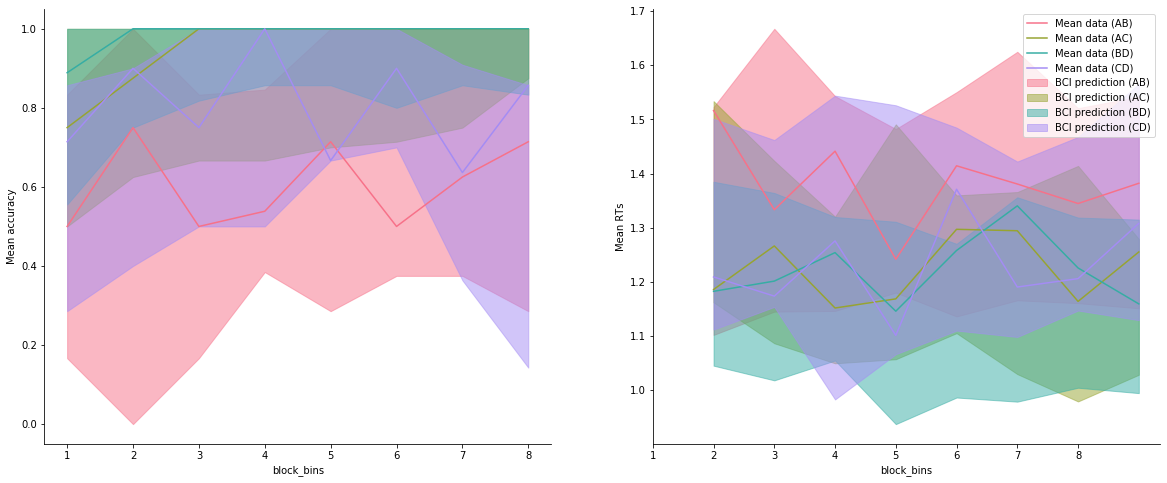

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

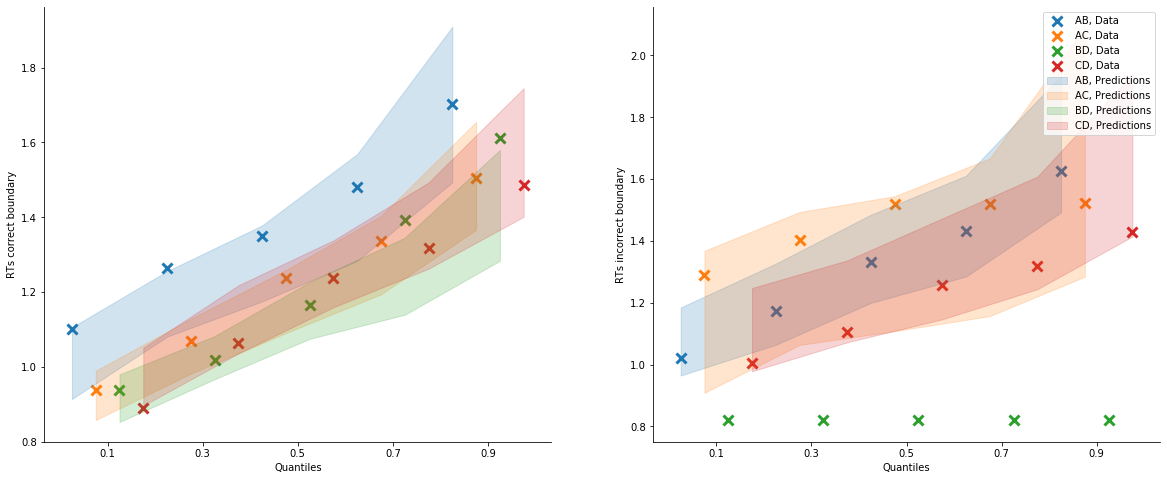

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [25]:
import seaborn as sns

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/fits_race.py:242: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=140
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


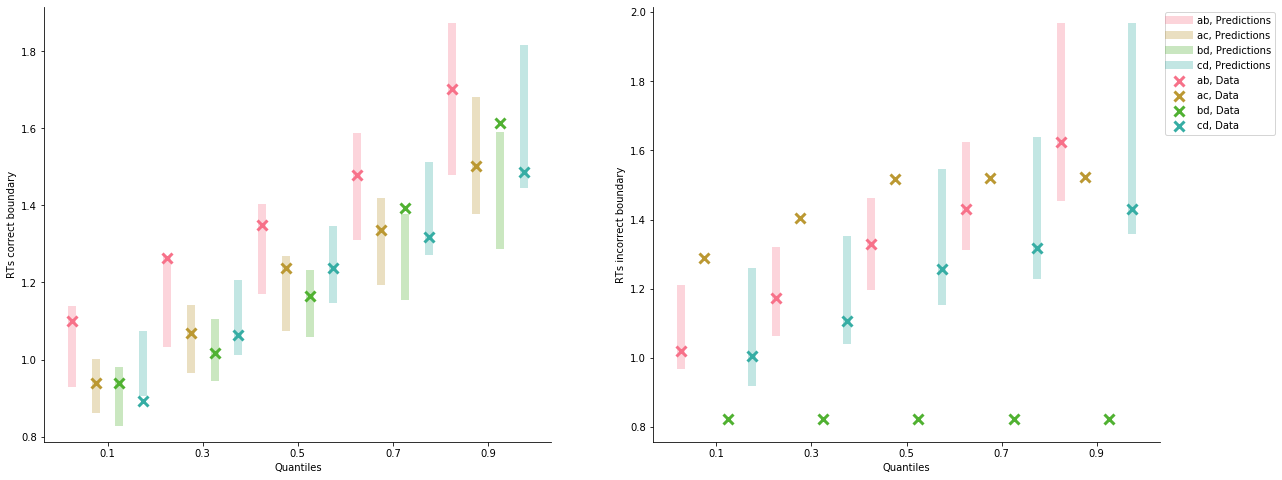

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);

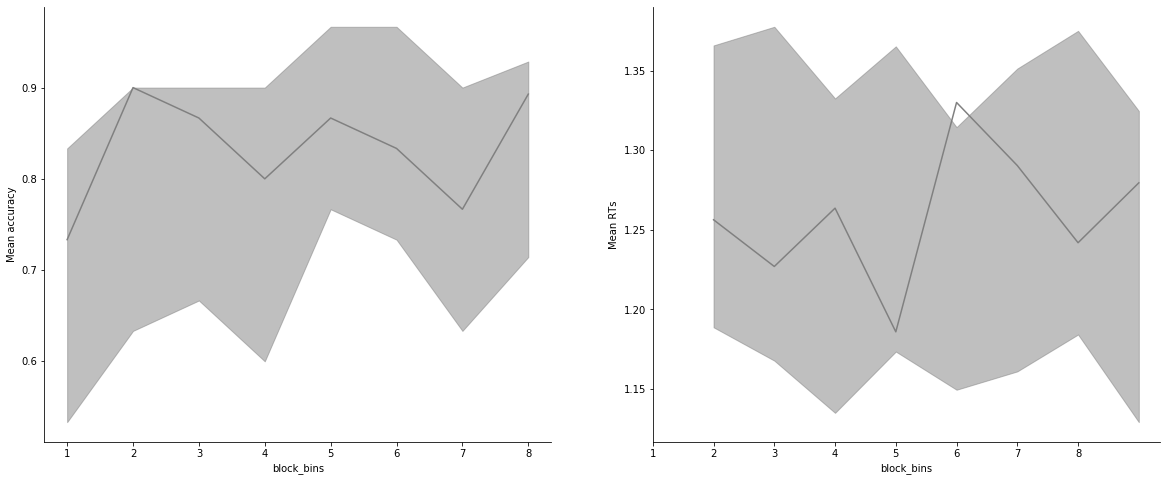

In [27]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=100,
    figsize=(20,8));